# Objective:-- This is a usecase where we aim to find the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
country_df=pd.read_csv('COVID_19_WORLD.CSV')

# Finding insights of the data and what it consist of

In [3]:
country_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [4]:
country_df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [5]:
#finding number of rows and columns present in the dataset
country_df.shape

(6603, 9)

In [6]:
#finding the information about the dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [7]:
#finding the number of country present in the dataset and their count
print(country_df['Country'].unique())
print("\n")
print(country_df['Country'].value_counts())

['USA' 'Russia' 'Spain' 'Brazil' 'UK' 'Italy' 'France' 'Germany' 'Turkey'
 'Iran' 'India' 'Peru' 'China' 'Canada' 'Saudi Arabia' 'Belgium' 'Mexico'
 'Chile' 'Netherlands' 'Pakistan' 'Qatar' 'Ecuador' 'Switzerland'
 'Belarus' 'Sweden' 'Portugal' 'Singapore' 'Ireland' 'UAE' 'Bangladesh'
 'Poland' 'Ukraine' 'Indonesia' 'Romania' 'Israel' 'South Africa' 'Japan'
 'Colombia' 'Austria' 'Kuwait' 'Egypt' 'Dominican Republic' 'Philippines'
 'S. Korea' 'Denmark' 'Serbia' 'Panama' 'Czechia' 'Argentina' 'Norway'
 'Algeria' 'Bahrain' 'Afghanistan' 'Australia' 'Morocco' 'Malaysia'
 'Kazakhstan' 'Finland' 'Nigeria' 'Moldova' 'Ghana' 'Oman' 'Armenia'
 'Bolivia' 'Luxembourg' 'Iraq' 'Hungary' 'Cameroon' 'Azerbaijan'
 'Thailand' 'Greece' 'Guinea' 'Uzbekistan' 'Honduras' 'Sudan' 'Senegal'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Ivory Coast' 'Guatemala'
 'Cuba' 'North Macedonia' 'Iceland' 'Estonia' 'Tajikistan' 'Lithuania'
 'DRC' 'Djibouti' 'New Zealand' 'Slovakia' 'Slovenia' 'Somalia' 'Gabon'
 'El 

In [8]:
#Cheking for null values
country_df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [9]:
country_df.dropna(axis=0,inplace=True)

In [10]:
#Cheking for null values
country_df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

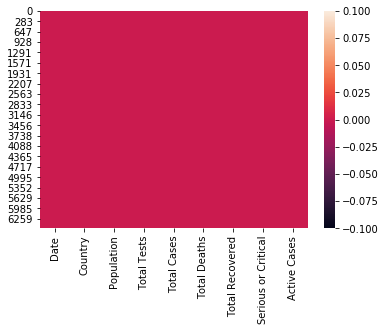

In [11]:
sns.heatmap(country_df.isnull())

In [12]:
country_df.shape

(3514, 9)

In [13]:
country_df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

Taking the last available date and doing our analysis on it

In [14]:
from datetime import datetime
last_date = datetime.strptime('18/05/2020', '%d/%m/%Y')

country_df = country_df.loc[country_df['Date'] == last_date.strftime('%Y-%m-%d'), :]
country_df = country_df.reset_index(drop=True)
country_df.head(26)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0
5,2020-05-18,France,65256826,1384633.0,179927.0,28239.0,61728.0,1998.0,89960.0
6,2020-05-18,Germany,83752855,3147771.0,177289.0,8123.0,154600.0,1133.0,14566.0
7,2020-05-18,Turkey,84230075,1650135.0,150593.0,4171.0,111577.0,903.0,34845.0
8,2020-05-18,Iran,83862642,701640.0,122492.0,7057.0,95661.0,2294.0,19774.0
9,2020-05-18,Peru,32915899,661132.0,94933.0,2789.0,30306.0,866.0,61838.0


# Bivariate Analysis

Text(0.5, 1.0, 'Total tests performed in each country')

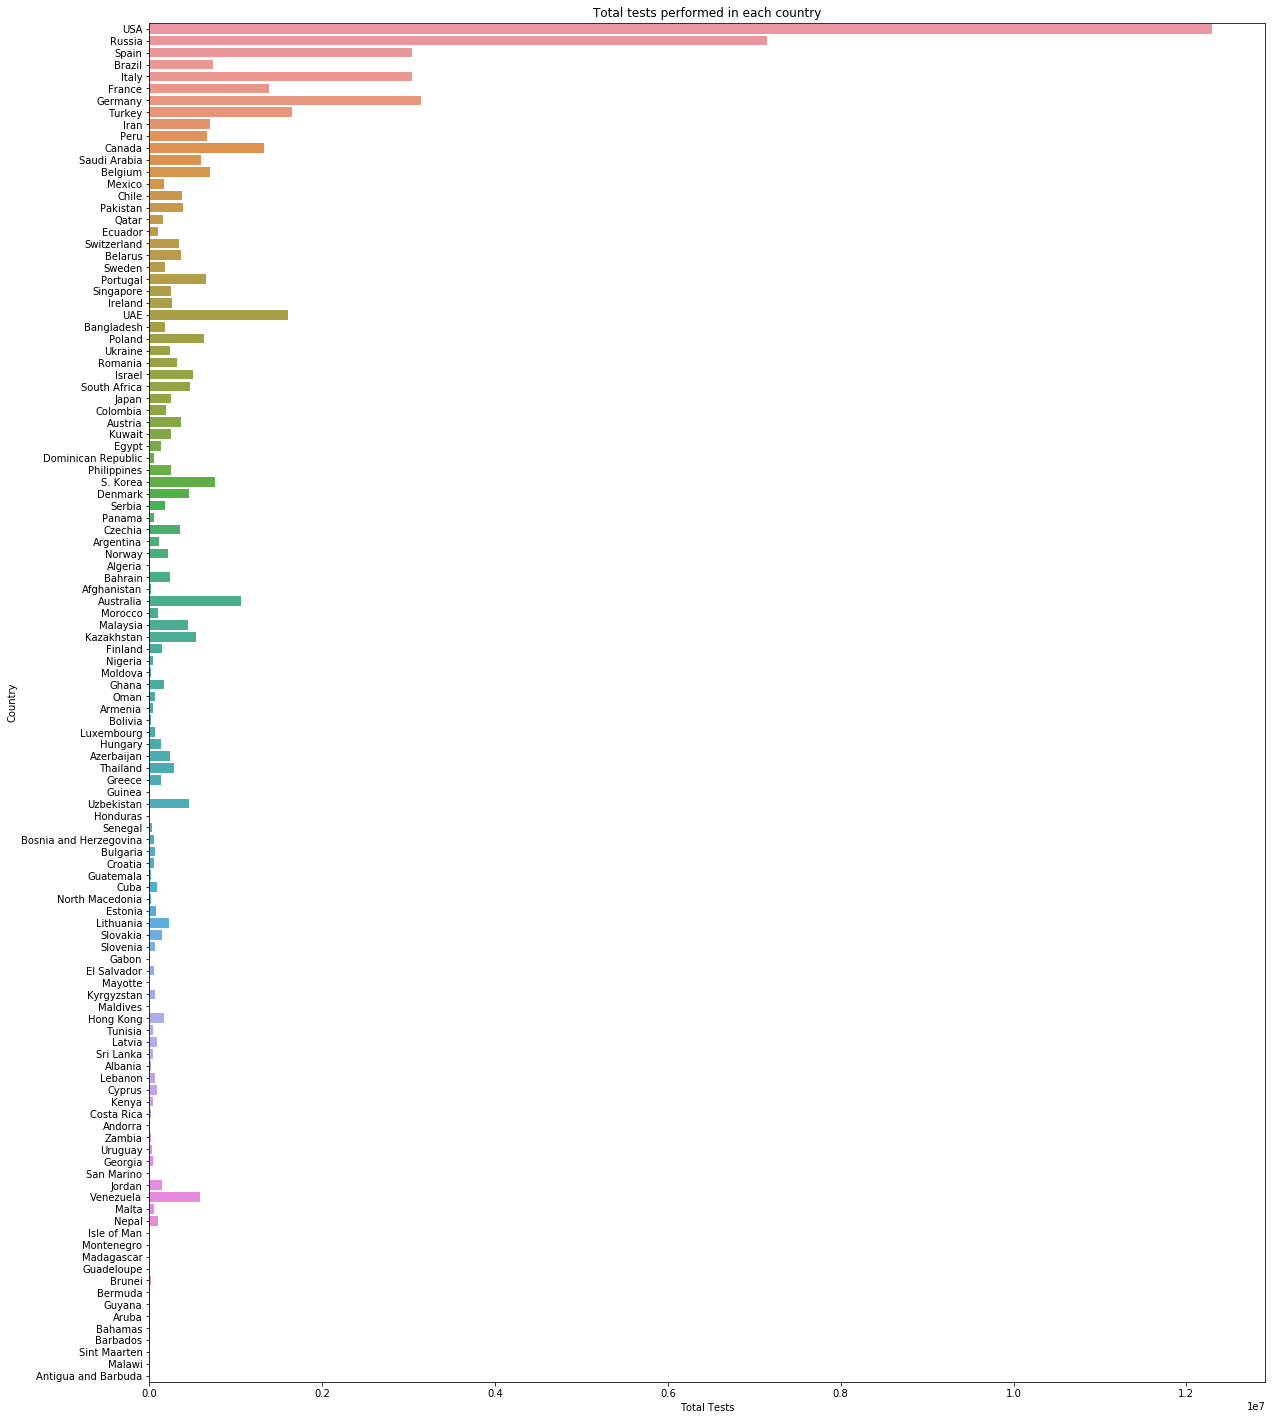

In [15]:
plt.figure(figsize=(20,25))
sns.barplot(country_df['Total Tests'],country_df['Country'])
plt.title('Total tests performed in each country')

Text(0.5, 1.0, 'Total Cases in each country')

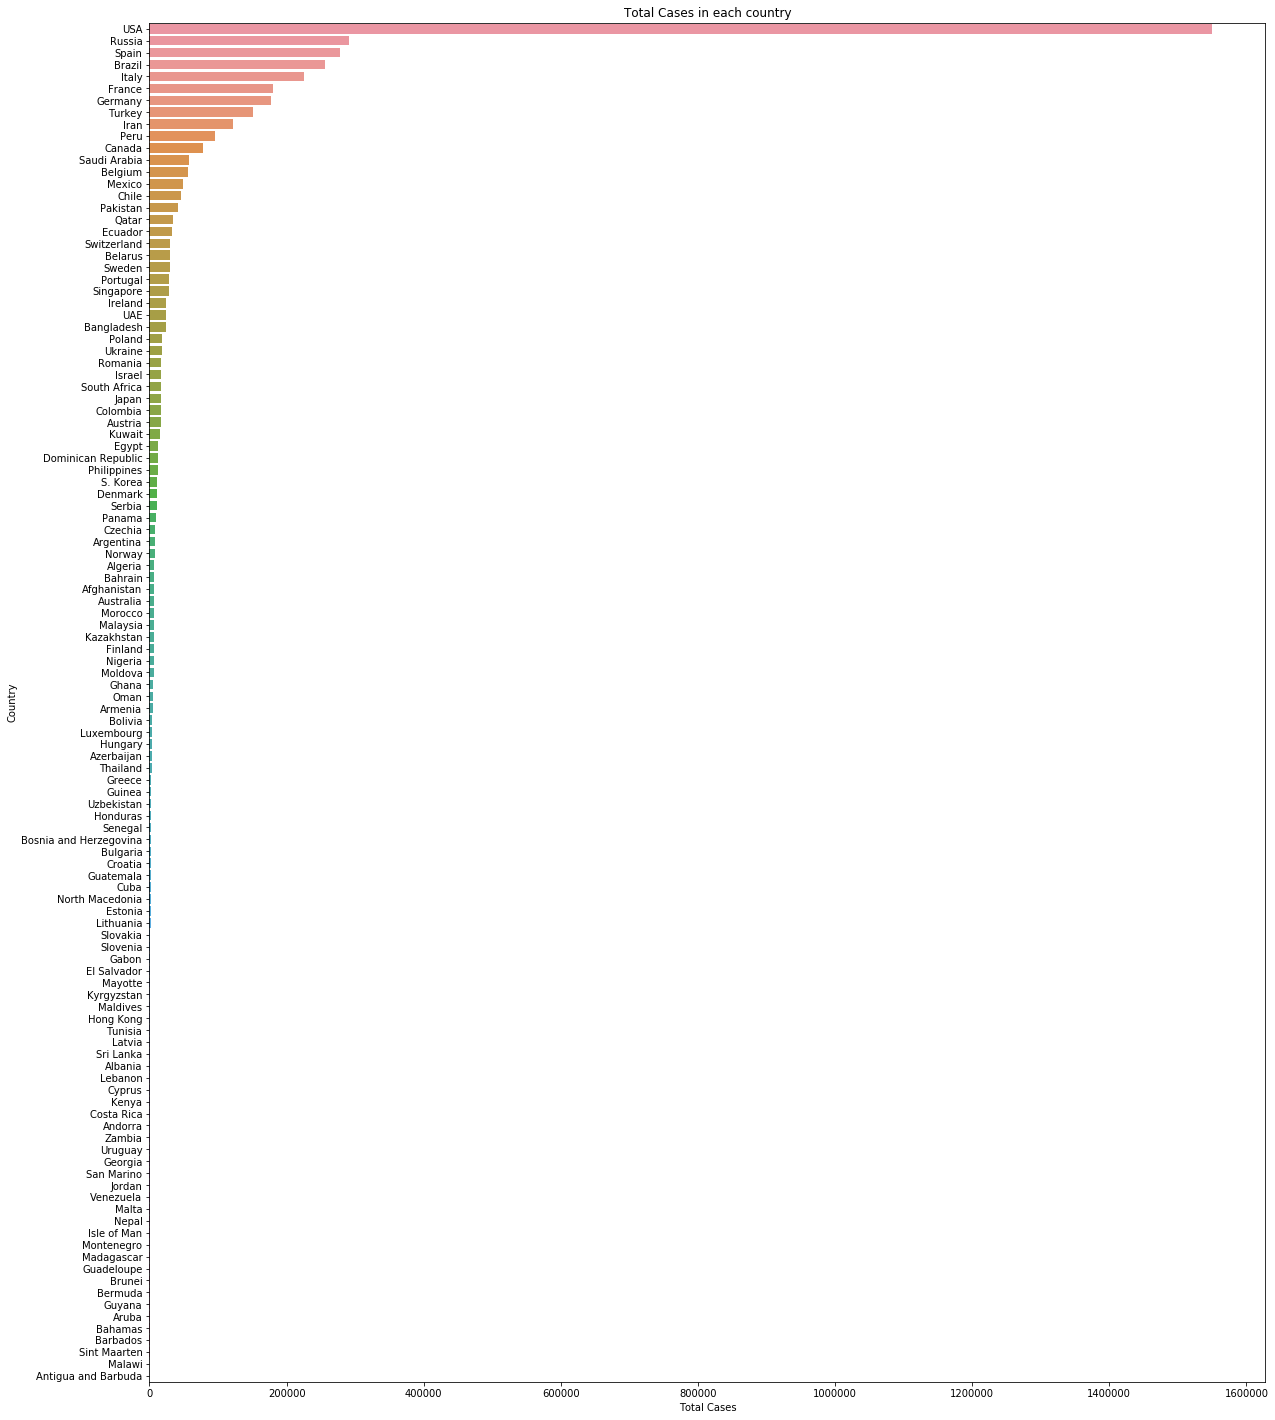

In [16]:
plt.figure(figsize=(20,25))
sns.barplot(country_df['Total Cases'],country_df['Country'])
plt.title('Total Cases in each country')

Text(0.5, 1.0, 'Total Deaths in each country')

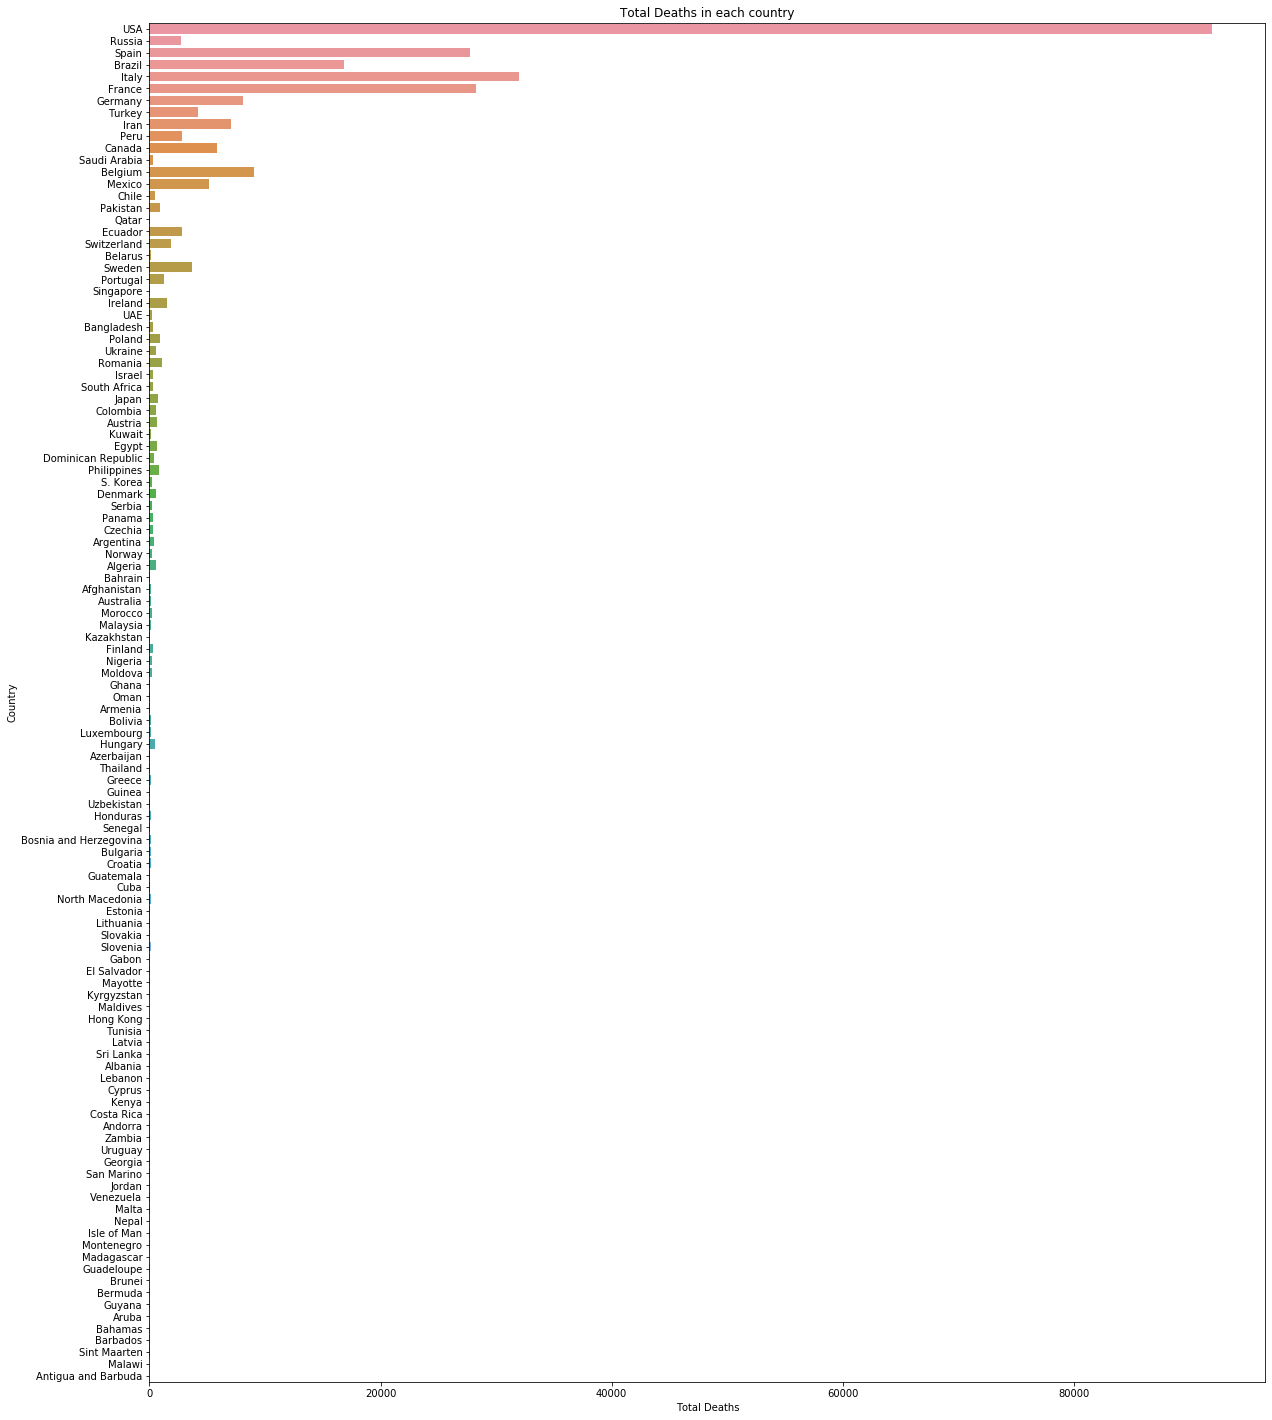

In [17]:
plt.figure(figsize=(20,25))
sns.barplot(country_df['Total Deaths'],country_df['Country'])
plt.title('Total Deaths in each country')

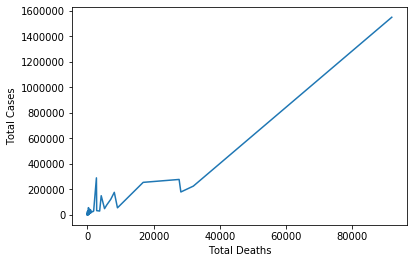

In [18]:
sns.lineplot(country_df['Total Deaths'],country_df['Total Cases'])

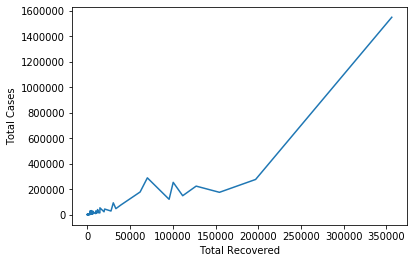

In [19]:
sns.lineplot(country_df['Total Recovered'],country_df['Total Cases'])

In [20]:
#As the number of case increased the recovery rate also increased and is higher than the death rate

Text(0.5, 1.0, 'Death rate of each country')

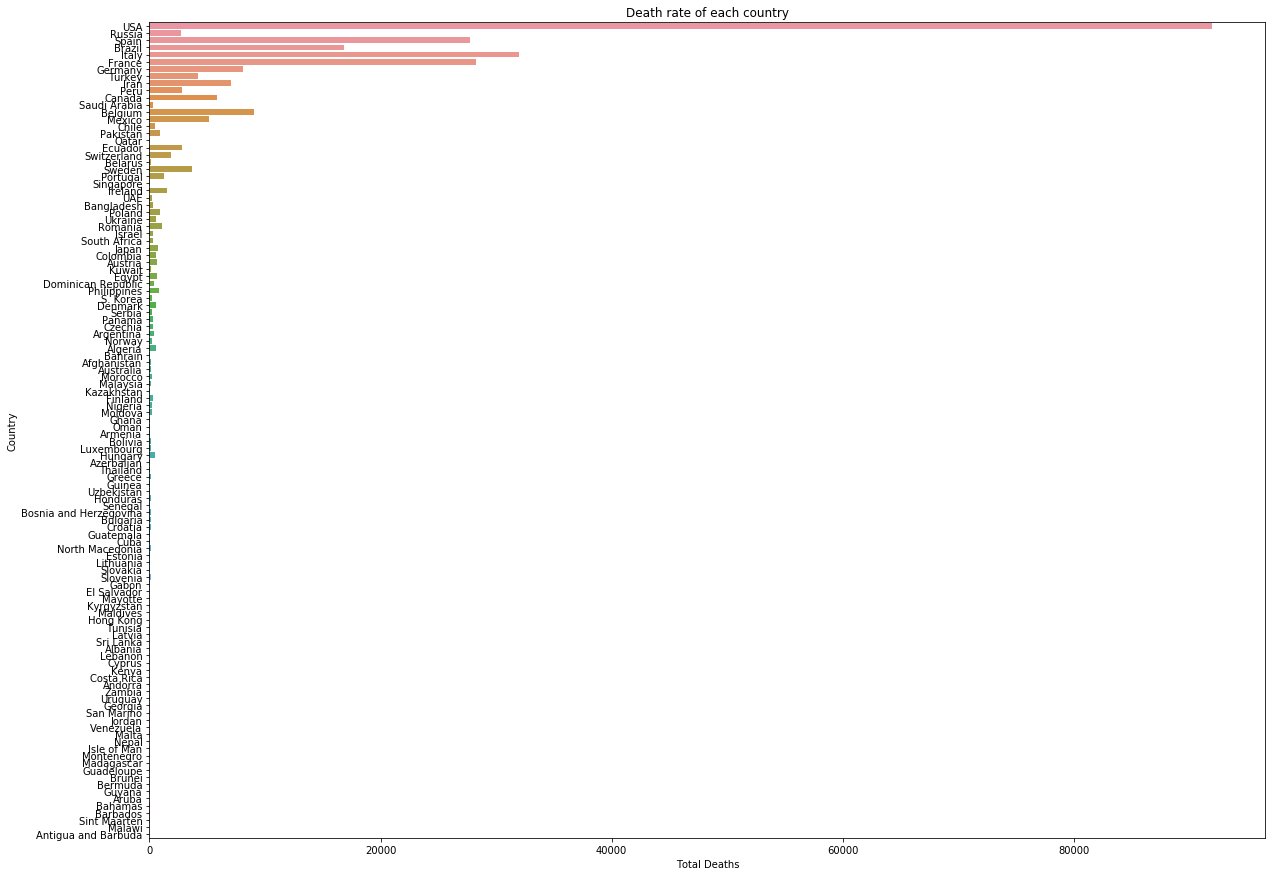

In [21]:
plt.figure(figsize=(20,15))
sns.barplot(country_df['Total Deaths'],country_df['Country'])
plt.title('Death rate of each country')

Text(0.5, 1.0, 'Death rate of each country')

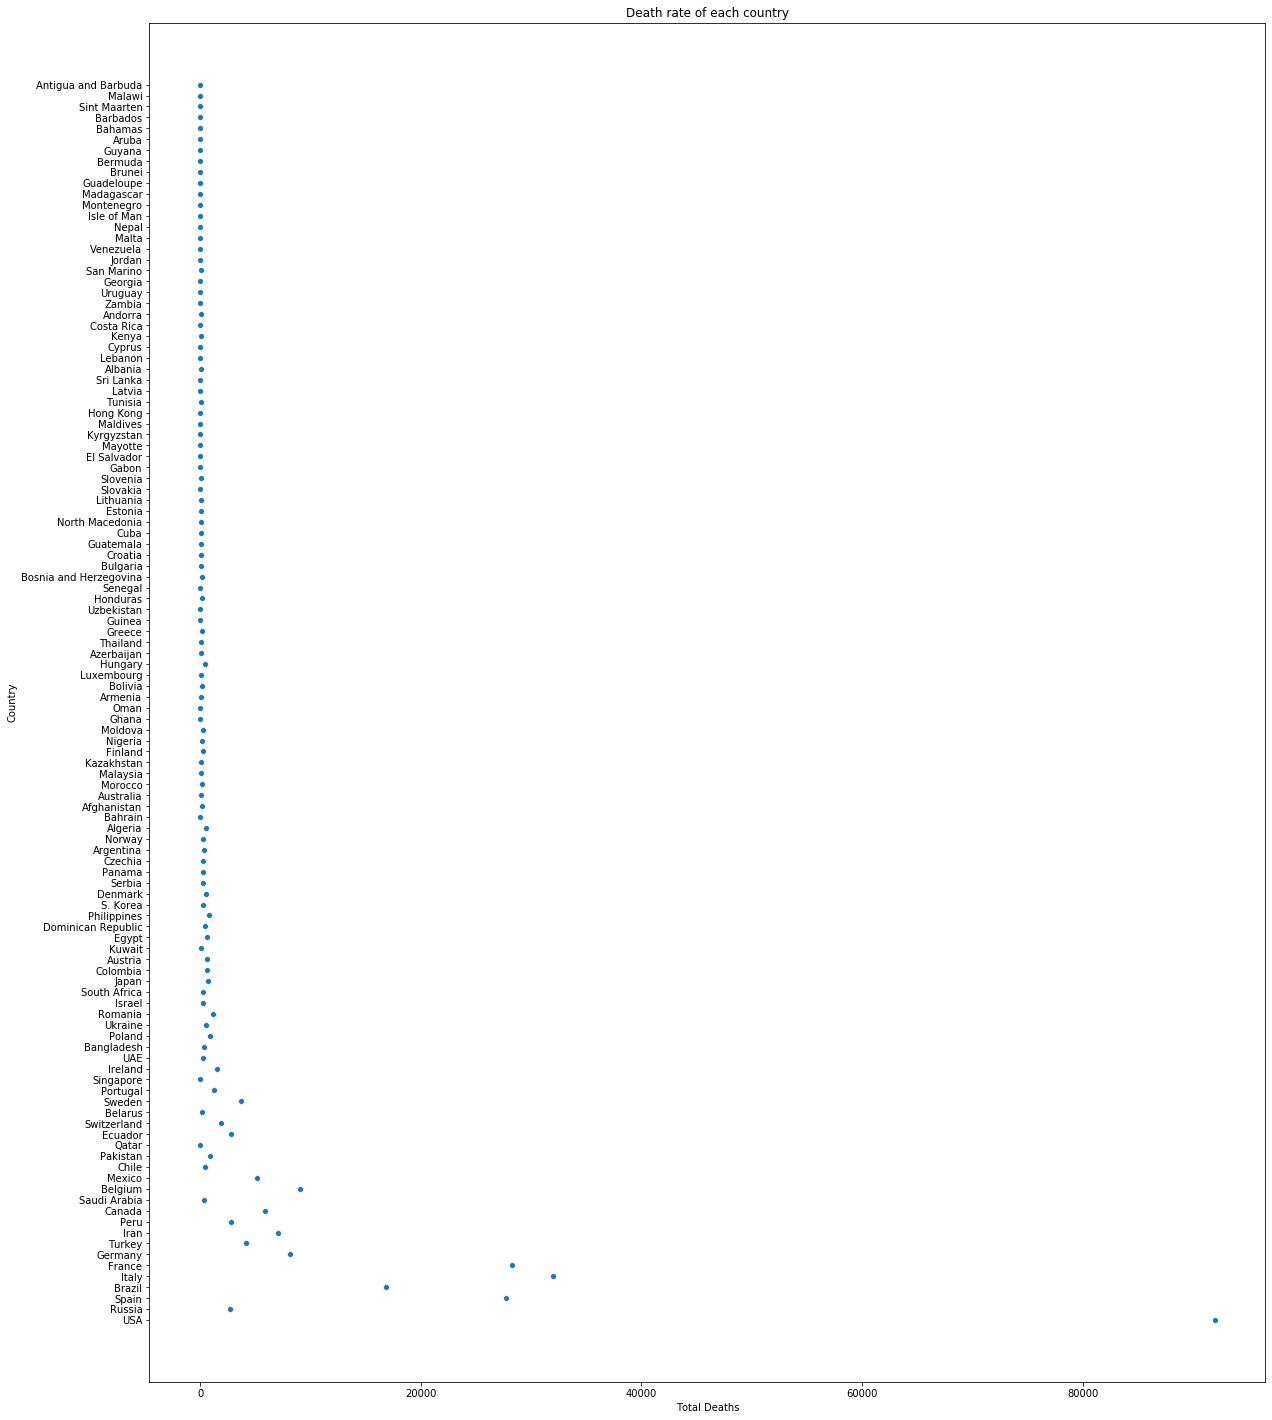

In [22]:
plt.figure(figsize=(20,25))
sns.scatterplot(country_df['Total Deaths'],country_df['Country'])
plt.title('Death rate of each country')

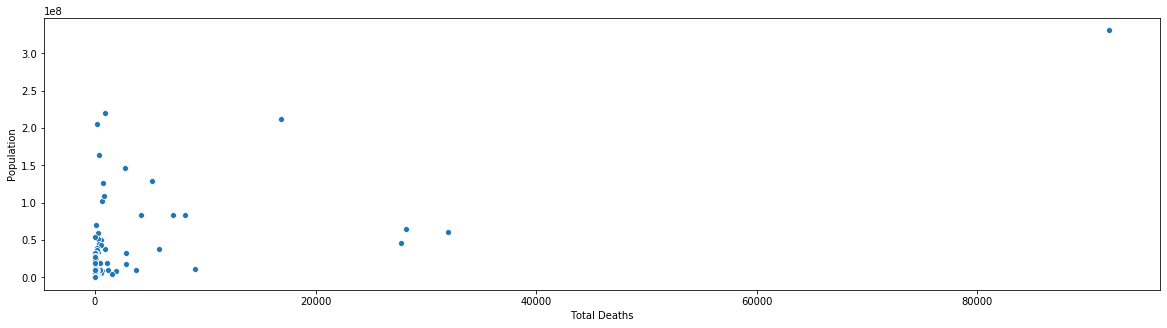

In [23]:
plt.figure(figsize=(20,5))
sns.scatterplot(country_df['Total Deaths'],country_df['Population'])

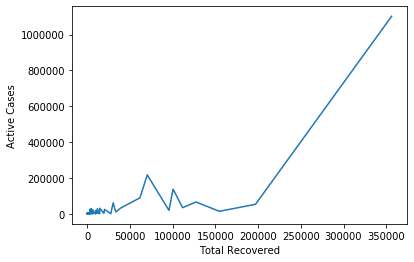

In [24]:
sns.lineplot(country_df['Total Recovered'],country_df['Active Cases'])

In [25]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
country_df['Country']=lb.fit_transform(country_df['Country'])

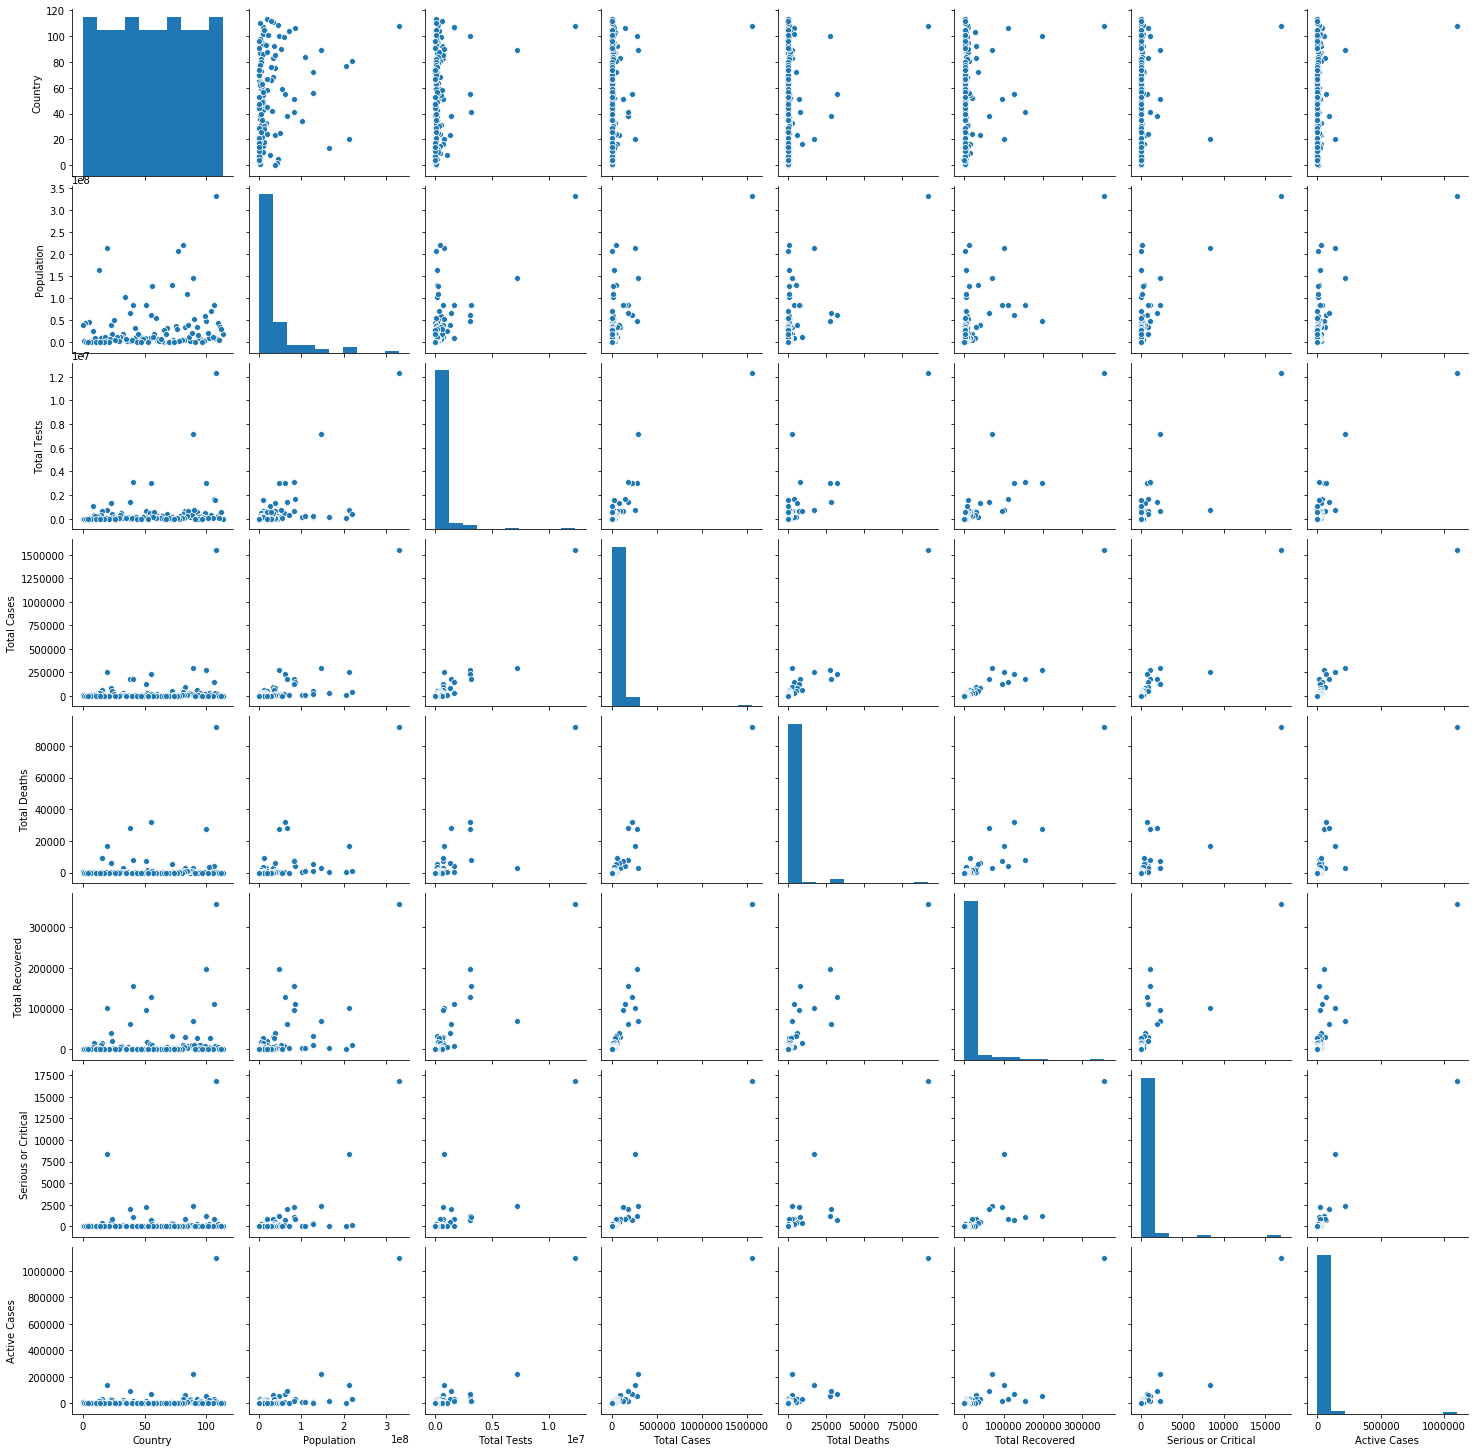

In [26]:
sns.pairplot(country_df)

# Univariate Analysis

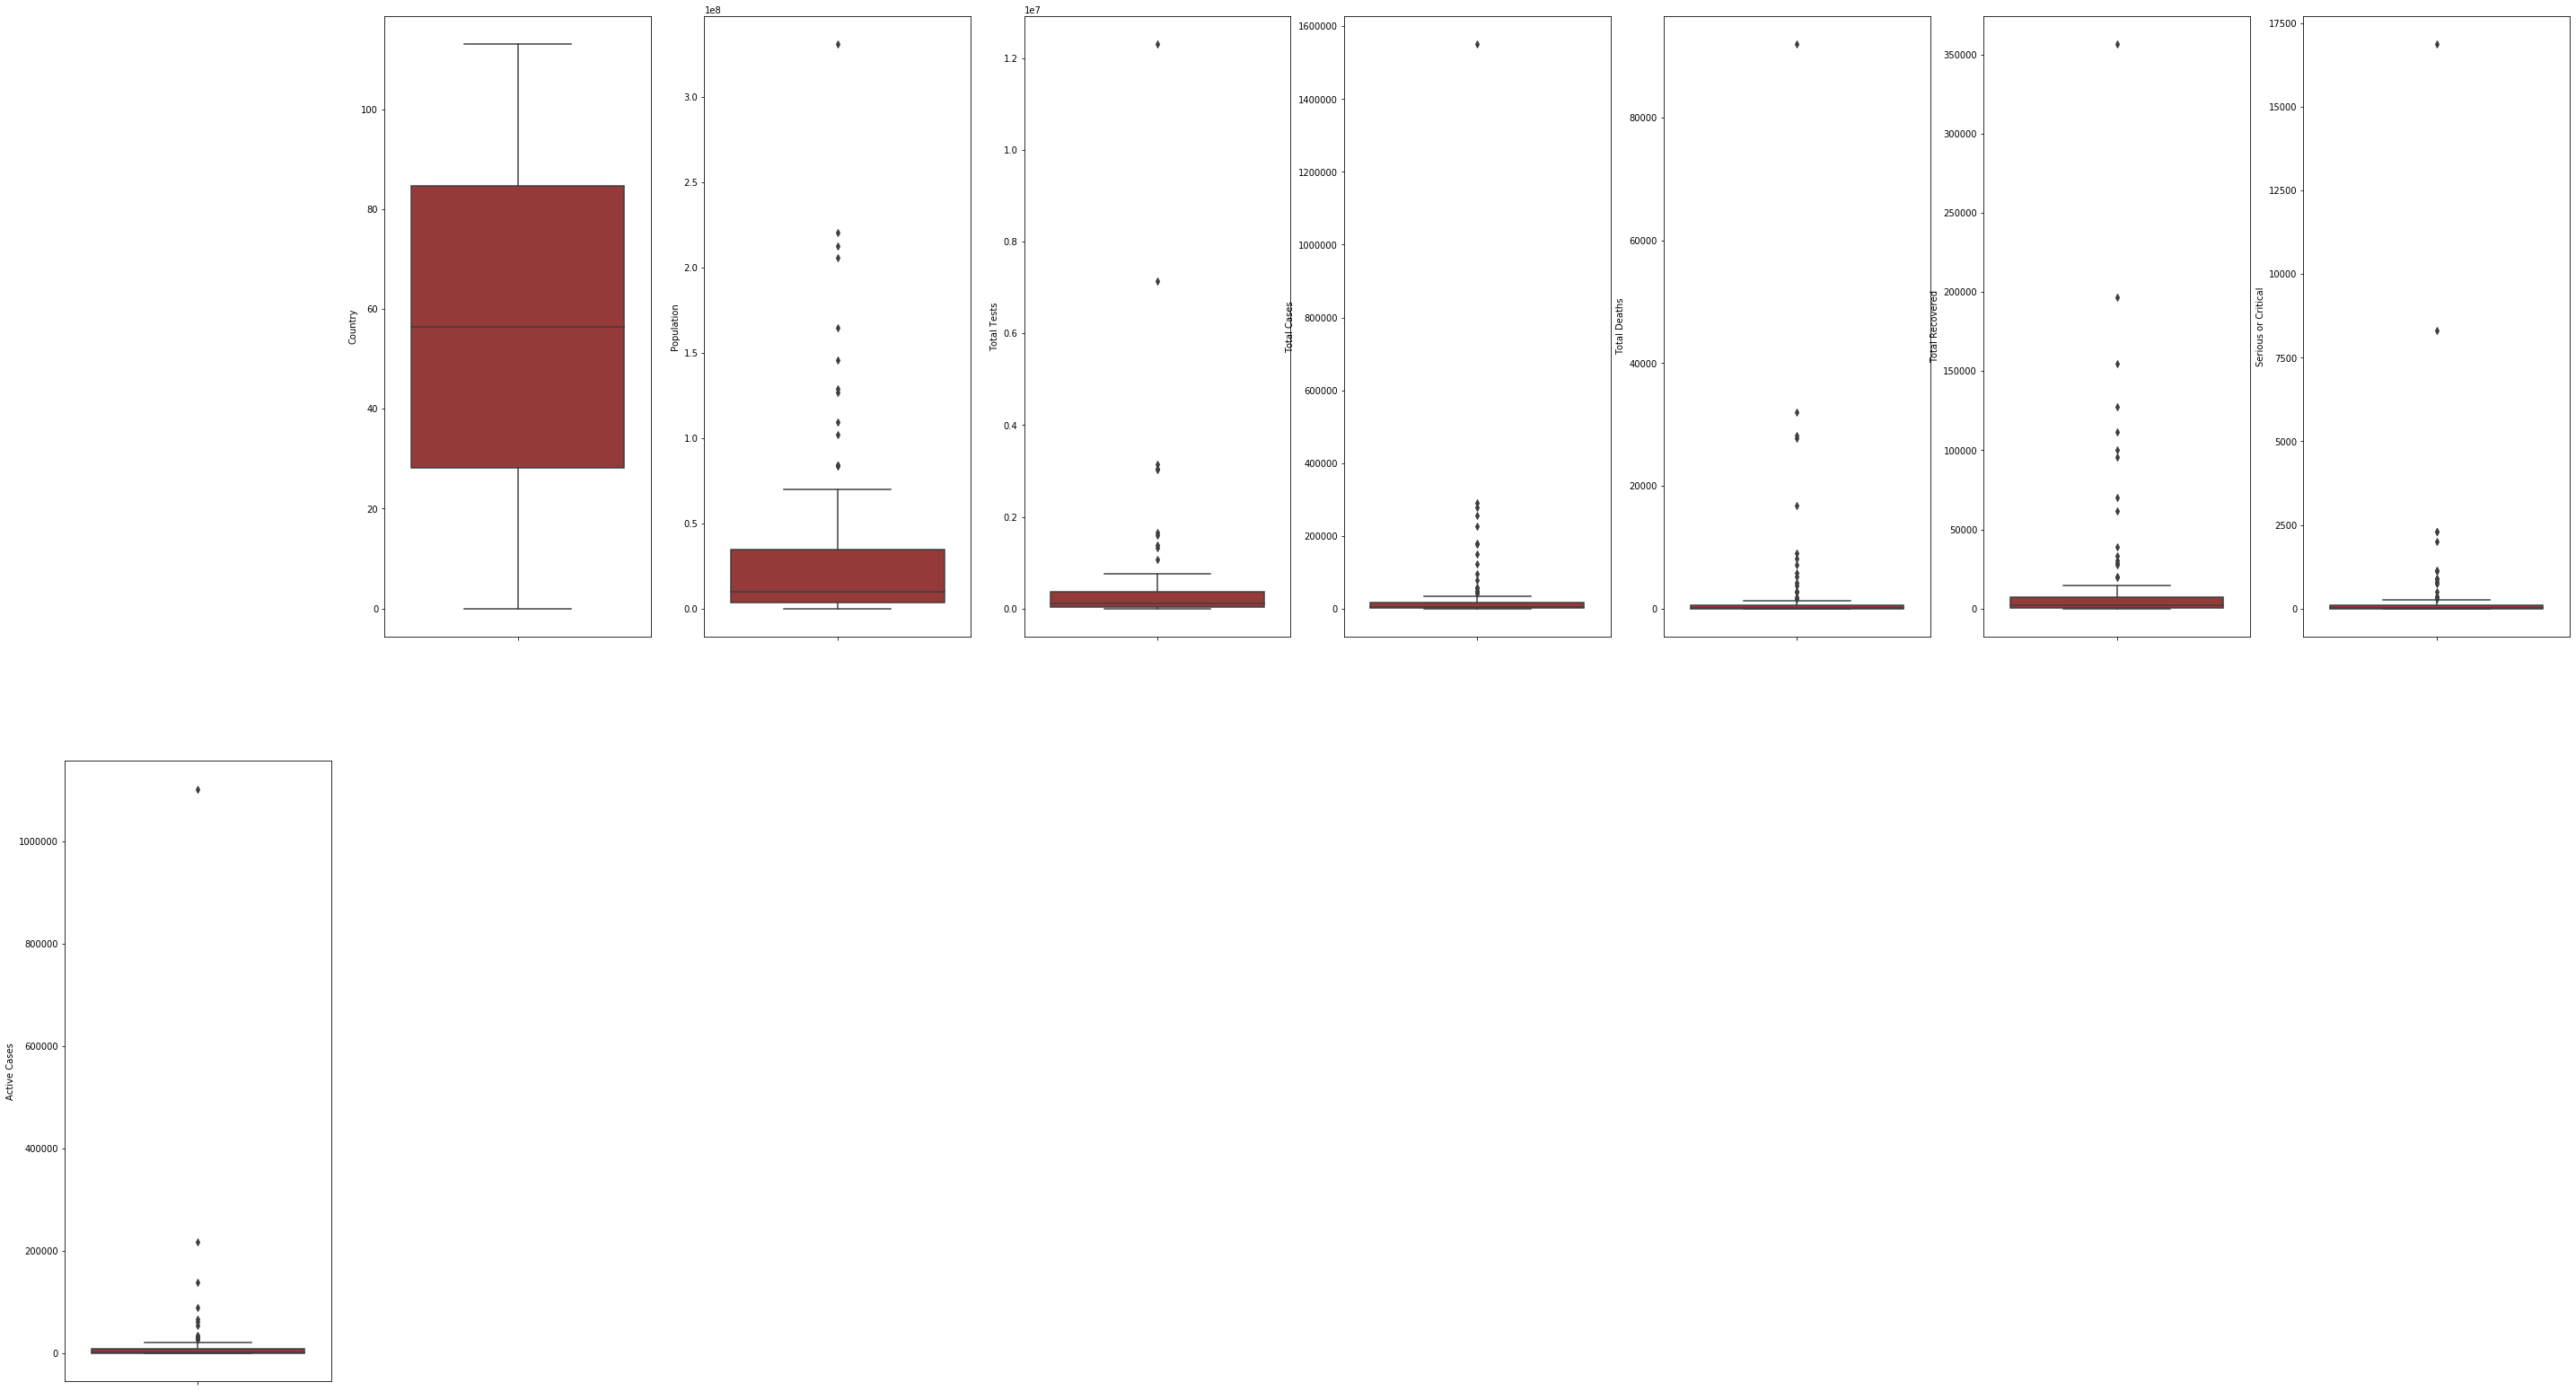

In [27]:
#using boxplot to see outliers and IQR range
collist=country_df.columns.values
ncol=8
nrows=10
plt.figure(figsize=(50,150))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(country_df[collist[i]],color='brown',orient='v')

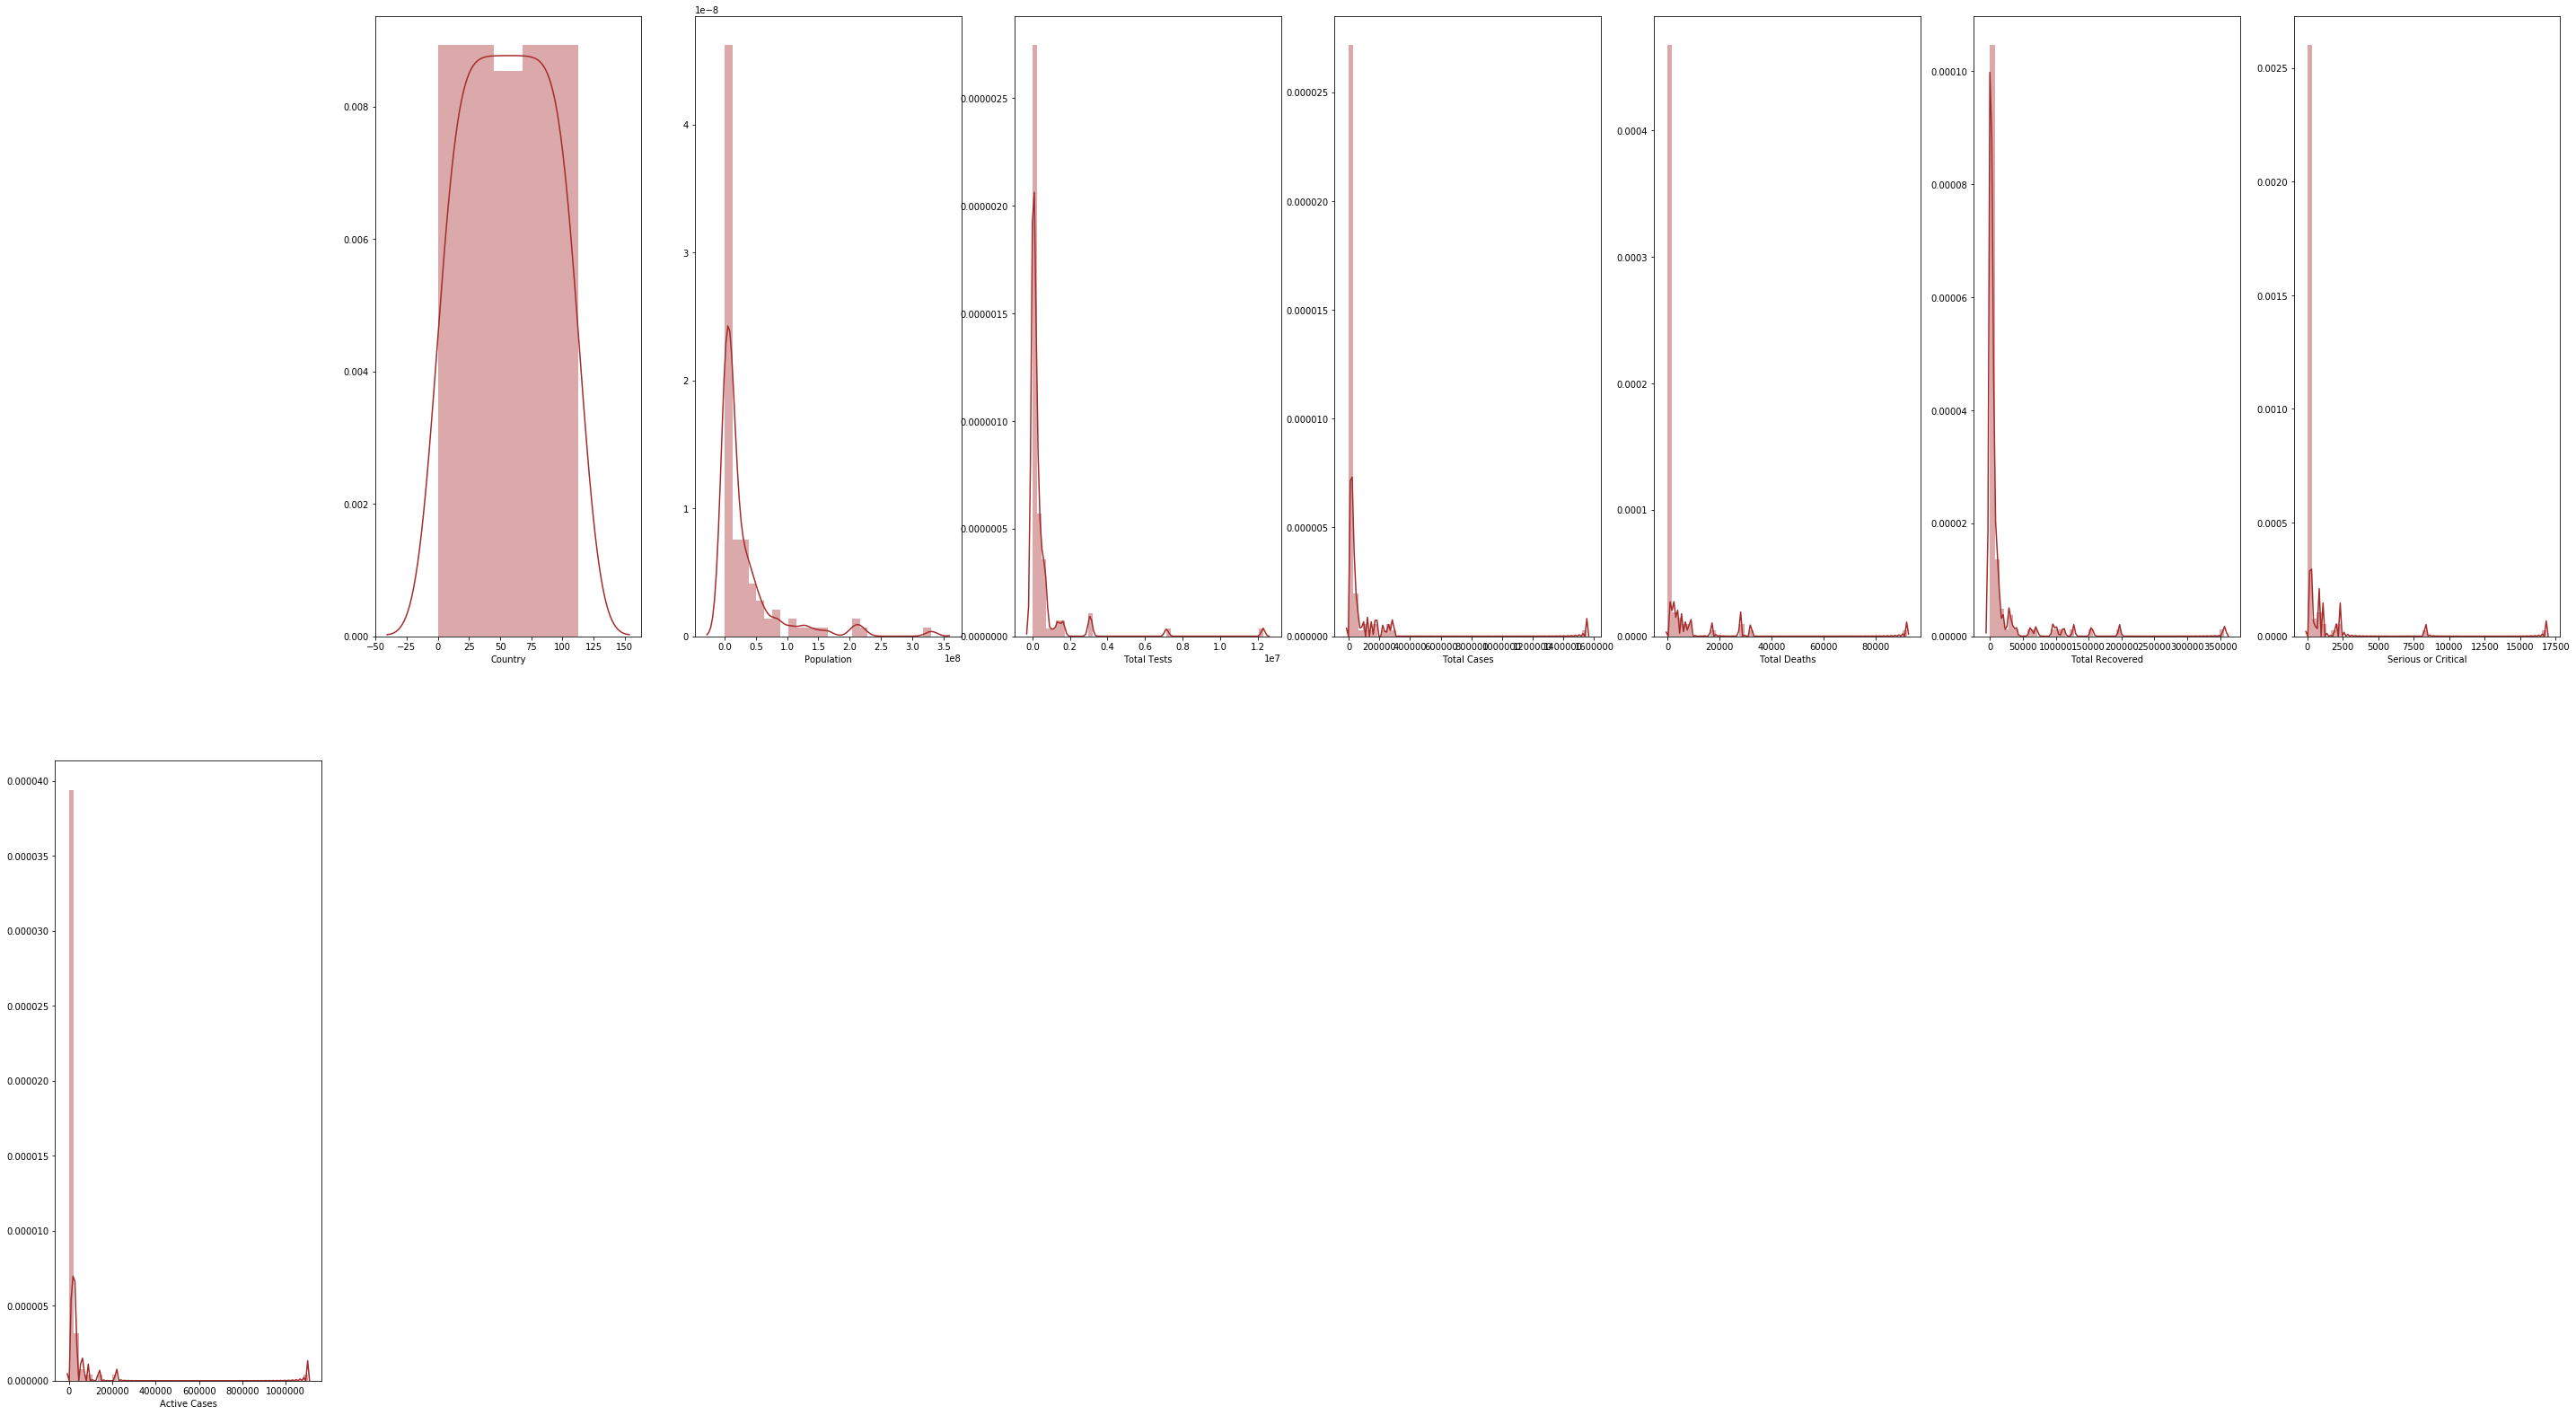

In [28]:
plt.figure(figsize=(50,150))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(country_df[collist[i]],color='brown')

In [29]:
#the distribution graph conveys that the data is positively skewed

# Statistical Analysis

In [30]:
country_df.describe()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,114.000000,1.140000e+02,1.140000e+02,1.140000e+02,114.000000,114.000000,114.000000,1.140000e+02
mean,56.500000,3.089666e+07,4.742398e+05,3.822461e+04,2362.605263,15479.842105,375.596491,2.038217e+04
std,33.052988,5.267301e+07,1.403948e+06,1.533449e+05,9878.416367,44830.839403,1781.657599,1.057621e+05
min,0.000000,3.392300e+04,1.830000e+02,2.500000e+01,1.000000,19.000000,1.000000,3.000000e+00
25%,28.250000,3.330398e+06,2.377250e+04,1.017500e+03,17.250000,498.500000,4.000000,3.302500e+02
50%,56.500000,1.011007e+07,1.187565e+05,5.101000e+03,105.500000,1982.500000,15.000000,1.477500e+03
75%,84.750000,3.441299e+07,3.623680e+05,1.693775e+04,520.750000,7126.750000,109.500000,9.080750e+03
max,113.000000,3.307747e+08,1.230074e+07,1.550294e+06,91981.000000,356383.000000,16868.000000,1.101930e+06


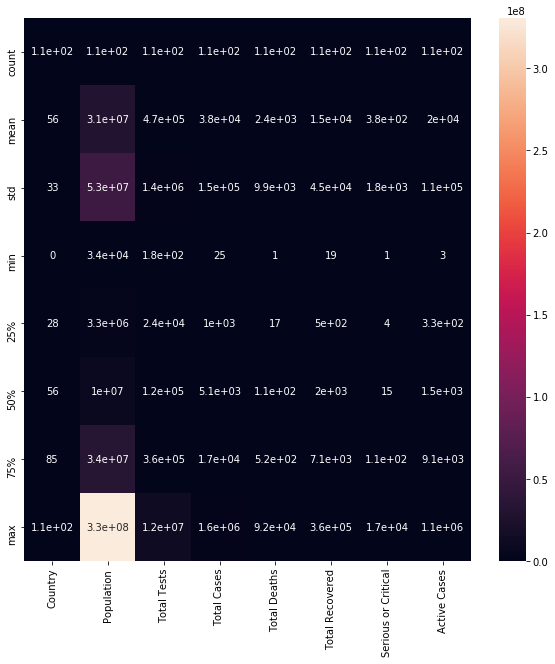

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(country_df.describe(),annot=True)

In [32]:
country_df.corr()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Country,1.000000,0.153424,0.209650,0.168086,0.126984,0.170303,0.102259,0.159660
Population,0.153424,1.000000,0.611914,0.653558,0.592043,0.618429,0.680159,0.630156
Total Tests,0.209650,0.611914,1.000000,0.922561,0.840858,0.865621,0.806253,0.892164
Total Cases,0.168086,0.653558,0.922561,1.000000,0.948868,0.898855,0.941007,0.980267
Total Deaths,0.126984,0.592043,0.840858,0.948868,1.000000,0.899591,0.881154,0.901043
Total Recovered,0.170303,0.618429,0.865621,0.898855,0.899591,1.000000,0.819594,0.795346
Serious or Critical,0.102259,0.680159,0.806253,0.941007,0.881154,0.819594,1.000000,0.934655
Active Cases,0.159660,0.630156,0.892164,0.980267,0.901043,0.795346,0.934655,1.000000


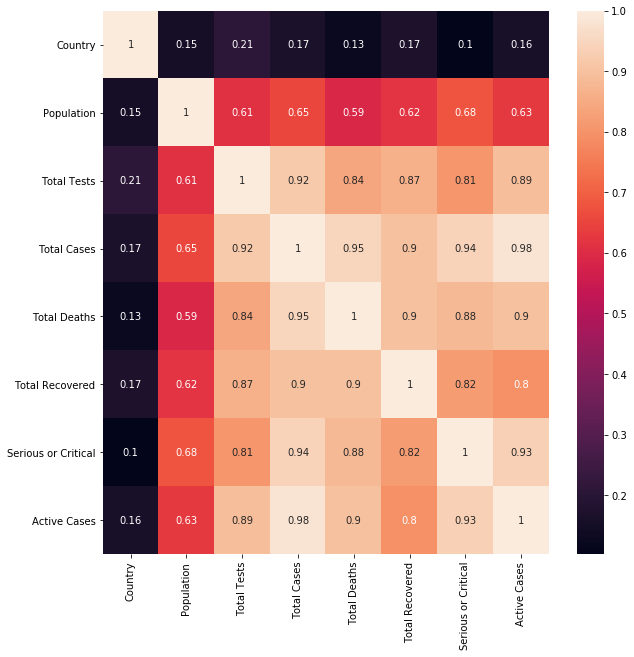

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(country_df.corr(),annot=True)

In [34]:
# according to the correlation heatmap we can say that population of a country is positively corelated with the total deaths and total cases in the country 

In [35]:
#Cheking the skewness
country_df.skew()

Country                0.000000
Population             3.142648
Total Tests            6.520944
Total Cases            8.763476
Total Deaths           7.308121
Total Recovered        5.174556
Serious or Critical    7.967693
Active Cases           9.703540
dtype: float64

In [36]:
#dropping the date column 
country_df.drop(['Date'],axis=1,inplace=True)

# Removing The outliers and Skewness

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(country_df))
print(z)

[[1.56498331e+00 5.71833657e+00 8.46094035e+00 9.90411065e+00
  9.11219567e+00 7.63778374e+00 9.29764396e+00 1.02713769e+01]
 [9.87610826e-01 2.19350487e+00 4.77384894e+00 1.65357906e+00
  3.65424439e-02 1.22618246e+00 1.08488848e+00 1.87435870e+00]
 [1.32187911e+00 3.02356880e-01 1.83405578e+00 1.57176909e+00
  2.57716409e+00 4.06593747e+00 4.37699901e-01 3.14716962e-01]
 [1.10916293e+00 3.46070112e+00 1.86713819e-01 1.42229724e+00
  1.47335056e+00 1.90392027e+00 4.47755477e+00 1.11753938e+00]
 [4.55820381e-02 5.63967010e-01 1.83657836e+00 1.22918905e+00
  3.01417501e+00 2.50586346e+00 2.10507394e-01 4.38480868e-01]
 [5.62178470e-01 6.55209716e-01 6.51315253e-01 9.28155892e-01
  2.63105329e+00 1.03616942e+00 9.14635042e-01 6.60775354e-01]
 [4.71014394e-01 1.00790821e+00 1.91270283e+00 9.10876894e-01
  5.85703908e-01 3.11692531e+00 4.26988592e-01 5.52356893e-02]
 [1.50420726e+00 1.01700826e+00 8.41261204e-01 7.36017102e-01
  1.83873486e-01 2.15301411e+00 2.97325374e-01 1.37352420e-01]


In [38]:
threhold=3

In [39]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  3,  4,  6, 15, 53],
      dtype=int64), array([1, 2, 3, 4, 5, 6, 7, 2, 5, 1, 6, 4, 5, 1, 1], dtype=int64))


In [40]:
z[0][1]#checking the above output result

5.718336571380055

In [41]:
z[53][1]#checking the above output result

3.3292255834342646

In [42]:
country_new=country_df[(z<3).all(axis=1)]  #removing outliers

In [43]:
print("Shape of the dataset before removing outliers",country_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",country_new.shape)

Shape of the dataset before removing outliers (114, 8)

 

Shape of the dataset after removing the outliers (106, 8)


In [44]:
#cheking skewness after removing outliers
country_new.skew()

Country                0.043763
Population             2.512955
Total Tests            2.518936
Total Cases            3.762419
Total Deaths           7.385616
Total Recovered        4.599239
Serious or Critical    5.103559
Active Cases           3.765344
dtype: float64

In [45]:
#removing the Skewness
collist=country_new.columns.values
for i in range(0,len(collist)):
    if country_new.skew().loc[collist[i]]>0.55:
        country_new[collist[i]]=np.sqrt(country_new[collist[i]])

In [46]:
#cheking skewness rs
country_new.skew()

Country                0.043763
Population             1.137354
Total Tests            1.075665
Total Cases            1.862840
Total Deaths           3.558131
Total Recovered        2.322226
Serious or Critical    2.752258
Active Cases           1.653811
dtype: float64

In [47]:
#removing the Skewness
collist=country_new.columns.values
for i in range(0,len(collist)):
    if country_new.skew().loc[collist[i]]>0.55:
        country_new[collist[i]]=np.sqrt(country_new[collist[i]])

In [48]:
#cheking skewness rs
country_new.skew()

Country                0.043763
Population             0.243632
Total Tests            0.250929
Total Cases            0.820257
Total Deaths           1.717175
Total Recovered        1.020049
Serious or Critical    1.446182
Active Cases           0.692530
dtype: float64

# Splitting the data into training and testing sets for maximum temprature

In [49]:
y=country_new['Total Deaths']

In [50]:
country_new.drop(['Total Deaths'],axis=1,inplace=True)

In [51]:
x=country_new.iloc[:,:]

In [52]:
x.head()

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
5,38,89.878639,34.303124,20.595583,15.762335,6.685731,17.318583
7,106,95.800284,35.840979,19.699318,18.276527,5.481784,13.662655
8,51,95.695636,28.942003,18.707981,17.586675,6.920673,11.858333
9,83,75.744557,28.514913,17.553119,13.194172,5.424747,15.769352
10,23,78.359799,33.917232,16.715671,14.073400,4.733430,13.478298


In [53]:
y.head()

5     12.963203
7      8.036372
8      9.165476
9      7.267117
10     8.742596
Name: Total Deaths, dtype: float64

In [54]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=df_x
print(x)

[[-5.27297633e-01  1.48977892e+00  2.18807269e+00  3.07975495e+00
   2.66292907e+00  3.50042822e+00  3.01349172e+00]
 [ 1.53609072e+00  1.75042226e+00  2.39501324e+00  2.85092307e+00
   3.42395397e+00  2.54391077e+00  1.97721253e+00]
 [-1.32826331e-01  1.74581616e+00  1.46665699e+00  2.59781759e+00
   3.21514145e+00  3.68708679e+00  1.46577407e+00]
 [ 8.38179951e-01  8.67662250e-01  1.40918584e+00  2.30296120e+00
   1.88556774e+00  2.49859538e+00  2.57435950e+00]
 [-9.82456828e-01  9.82773049e-01  2.13614544e+00  2.08914626e+00
   2.15170268e+00  1.94935420e+00  1.92495617e+00]
 [ 1.11127547e+00  9.13099537e-01  1.32027866e+00  1.77231974e+00
   1.83321860e+00  1.30597351e+00  1.78018706e+00]
 [-1.19486445e+00  1.01569402e-01  1.45997905e+00  1.74119067e+00
   1.22231939e+00  1.60530026e+00  1.89033807e+00]
 [ 5.04396542e-01  2.22249978e+00  3.13653939e-01  1.62423323e+00
   1.98163904e+00  1.69186462e+00  9.88254298e-01]
 [-9.52112882e-01  4.43408517e-01  9.15310869e-01  1.56166699e+0

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [56]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.8377451382252894 at random state 42
R2 SCORE is equal to : 0.658622031894315 at random state 43
R2 SCORE is equal to : 0.5460411206761686 at random state 44
R2 SCORE is equal to : 0.8339520436894362 at random state 45
R2 SCORE is equal to : 0.7658965402602219 at random state 46
R2 SCORE is equal to : 0.8240933046566248 at random state 47
R2 SCORE is equal to : 0.4387358575512711 at random state 48
R2 SCORE is equal to : 0.8455589415057284 at random state 49
R2 SCORE is equal to : 0.6916659897049366 at random state 50
R2 SCORE is equal to : 0.879939381620273 at random state 51
R2 SCORE is equal to : 0.8192531013933031 at random state 52
R2 SCORE is equal to : 0.8322198974379496 at random state 53
R2 SCORE is equal to : 0.867362794623837 at random state 54
R2 SCORE is equal to : 0.6318134306456795 at random state 55
R2 SCORE is equal to : 0.7339910729145042 at random state 56
R2 SCORE is equal to : 0.8588272834471671 at random state 57
R2 SCORE is equal to : 0.76

In [57]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=51)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(79, 7) (27, 7) (79,) (27,)


In [58]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [59]:
from sklearn.linear_model import Lasso,Ridge

In [60]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.7557542920312924


The R2 score is 0.8798278655559625


In [61]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.7557553059939923


The r2_score is 0.8799082009306098


In [62]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.5451067680846011
The r2_score is 0.5717051987428308


array([-0.        ,  0.00118459,  0.        ,  0.31817425,  0.17971045,
        0.24201794,  0.1873711 ])

In [63]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'friedman_mse'}

In [64]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 9}

In [65]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'linear'}

In [70]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='linear'),DecisionTreeRegressor(criterion='friedman_mse'),KNeighborsRegressor(n_neighbors=9)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.879939381620273




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.8382249280647031




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.723174151440843




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')


R2_SCORE = 0.6735275909507734




In [68]:
#svr is giving Good result hence finalizing it

In [69]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
print("\n")
preed=svr.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.7260679154237525


The R2 score is 0.8382249280647031


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.9999999700051005
R2 Score = 0.5407320294226762


In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=svr, n_estimators=100)
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))
pred=ada.predict(x_test)
print("Predicted result",pred)
print("\n \n")
print("Actual result \n",y_test)

0.7285807679720511
Predicted result [3.90442052 2.88993637 1.86572542 1.16401152 2.27467088 4.84367336
 3.31634339 1.54054881 7.47613072 1.63142337 3.72848756 1.61504469
 1.76921706 1.94191229 5.18930134 4.73934688 2.31555463 9.88757084
 2.39787009 1.86418873 9.40523191 3.26284169 1.66371654 5.45764468
 2.37095469 1.76306647 2.34643055]

 

Actual result 
 51      2.432299
66      3.452010
110     1.626577
107     1.778279
95      1.861210
18      6.590000
55      2.320596
106     1.732051
10      8.742596
100     1.189207
50      3.260390
80      2.059767
84      2.590020
88      2.258101
26      5.531195
39      4.838326
67      2.258101
8       9.165476
87      2.359611
76      2.300327
5      12.963203
64      2.000000
86      1.732051
19      3.616172
91      1.778279
94      2.114743
78      1.821160
Name: Total Deaths, dtype: float64


In [74]:
r_score=r2_score(y_test,pred)
print("The r2_Score after apllying Boosting Technique for Linear _Regression is", r_score)

The r2_Score after apllying Boosting Technique for Linear _Regression is 0.8577182411790504


In [75]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,preed))
print("Mean squared error:",mean_absolute_error(y_test,preed))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,preed)))

ERROR
MEan Absolute error: 0.7410469439068627
Mean squared error: 0.7410469439068627
Root mean squared error: 1.1126871439790087


In [76]:
#saving the model with svr 
from sklearn.externals import joblib
joblib.dump(svr,"svr_Covid_19_World_Death_Rate.pkl")

['svr_Covid_19_World_Death_Rate.pkl']

# Examine Death Rate with respect to age in each country

In [81]:
ppl_df=pd.read_csv('population.csv')
world_df=pd.read_csv('COVID_19_WORLD.CSV')

In [84]:
last_date = datetime.strptime('18/05/2020', '%d/%m/%Y')

world_df=world_df.loc[world_df['Date'] == last_date.strftime('%Y-%m-%d'), :]
world_df = world_df.reset_index(drop=True)
world_df.head(26)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
5,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0
6,2020-05-18,France,65256826,1384633.0,179927.0,28239.0,61728.0,1998.0,89960.0
7,2020-05-18,Germany,83752855,3147771.0,177289.0,8123.0,154600.0,1133.0,14566.0
8,2020-05-18,Turkey,84230075,1650135.0,150593.0,4171.0,111577.0,903.0,34845.0
9,2020-05-18,Iran,83862642,701640.0,122492.0,7057.0,95661.0,2294.0,19774.0


In [78]:
ppl_df.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [86]:
world_df.isnull().sum()

Date                    0
Country                 0
Population              0
Total Tests            28
Total Cases             0
Total Deaths           35
Total Recovered         4
Serious or Critical    86
Active Cases            2
dtype: int64

In [87]:
world_df.dropna(axis=0,inplace=True)

In [88]:
world_df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [89]:
world_df = world_df.merge(ppl_df, on='Country')

In [91]:
world_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0,0.189,0.657,0.154
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0,0.176,0.682,0.142
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0,0.147,0.659,0.194
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0,0.217,0.697,0.086
4,2020-05-18,Italy,60471924,3041366.0,225886.0,32007.0,127326.0,749.0,66553.0,0.135,0.635,0.230


Text(0.5, 1.0, 'DeathsRate W.R.T Fraction age 0-14 years')

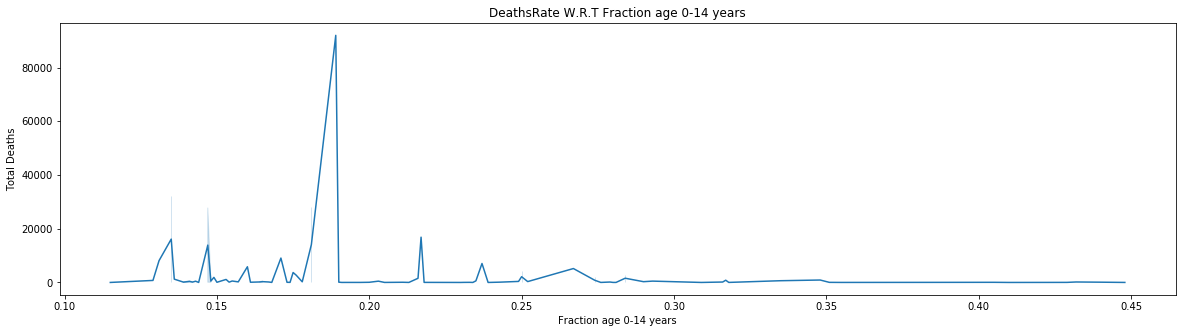

In [99]:
plt.figure(figsize=(20,5))
sns.lineplot(world_df['Fraction age 0-14 years'],world_df['Total Deaths'])
plt.title('DeathsRate W.R.T Fraction age 0-14 years')

Text(0.5, 1.0, 'DeathsRate W.R.T Fraction age 15-64 years')

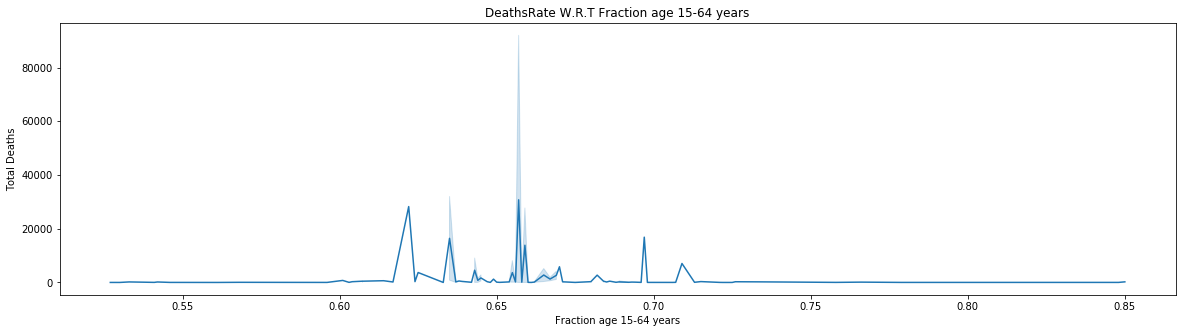

In [98]:
plt.figure(figsize=(20,5))
sns.lineplot(world_df['Fraction age 15-64 years'],world_df['Total Deaths'])
plt.title('DeathsRate W.R.T Fraction age 15-64 years')

Text(0.5, 1.0, 'DeathsRate W.R.T Fraction age 65+ years')

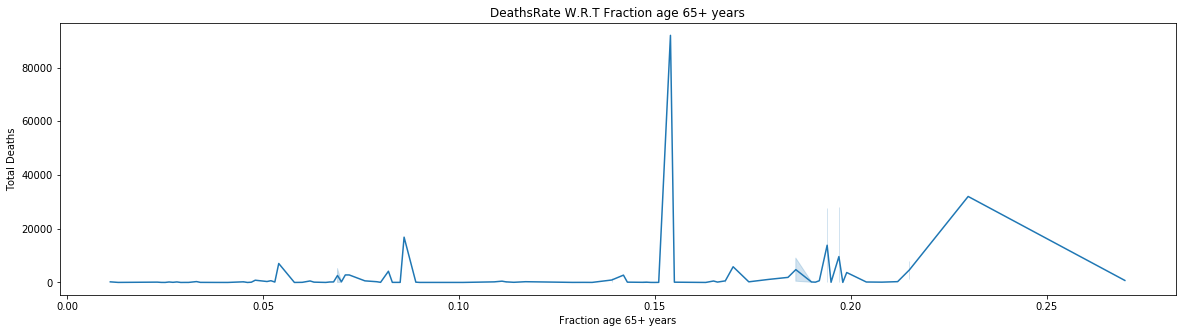

In [100]:
plt.figure(figsize=(20,5))
sns.lineplot(world_df['Fraction age 65+ years'],world_df['Total Deaths'])
plt.title('DeathsRate W.R.T Fraction age 65+ years')

By seeing the above three lineplot we can say that the children with age less than or equal to 10 and the old age people who are above 61 are at a higher risk of getting the virus and not able to fight it